In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
df = pd.read_csv('./Dataset.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

In [ ]:
df['Category'].unique()

In [ ]:
df['Category'][0]

In [ ]:
df['Resume'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Model: K-Nearest Neighbors
Training Accuracy: 0.988296488946684
Test Accuracy: 0.9844559585492227
Precision: 0.987157344670298
Recall: 0.9844559585492227
F1 Score: 0.9838159662252927
****************************************************************************************************


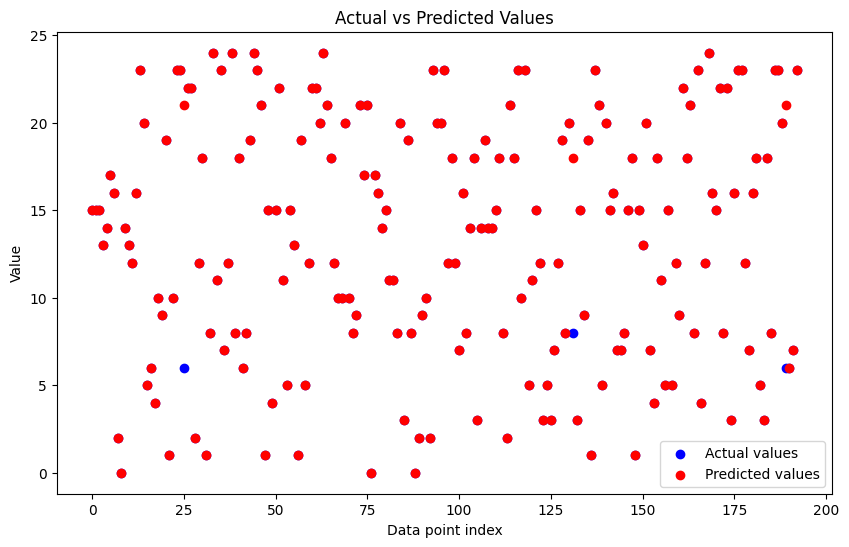

Model: Logistic Regression
Training Accuracy: 0.9973992197659298
Test Accuracy: 0.9948186528497409
Precision: 0.9954663212435233
Recall: 0.9948186528497409
F1 Score: 0.9948954135482634
****************************************************************************************************


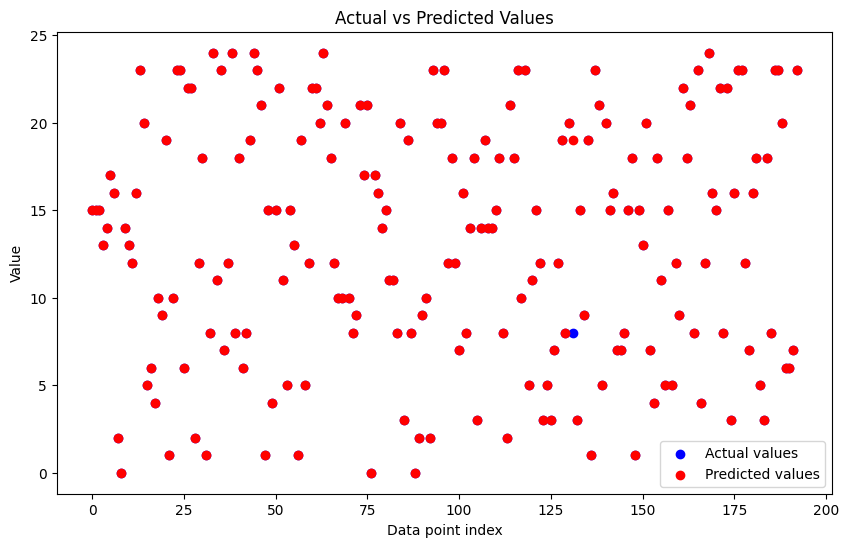

Model: Support Vector Machine
Training Accuracy: 1.0
Test Accuracy: 0.9948186528497409
Precision: 0.9954663212435233
Recall: 0.9948186528497409
F1 Score: 0.9948954135482634
****************************************************************************************************


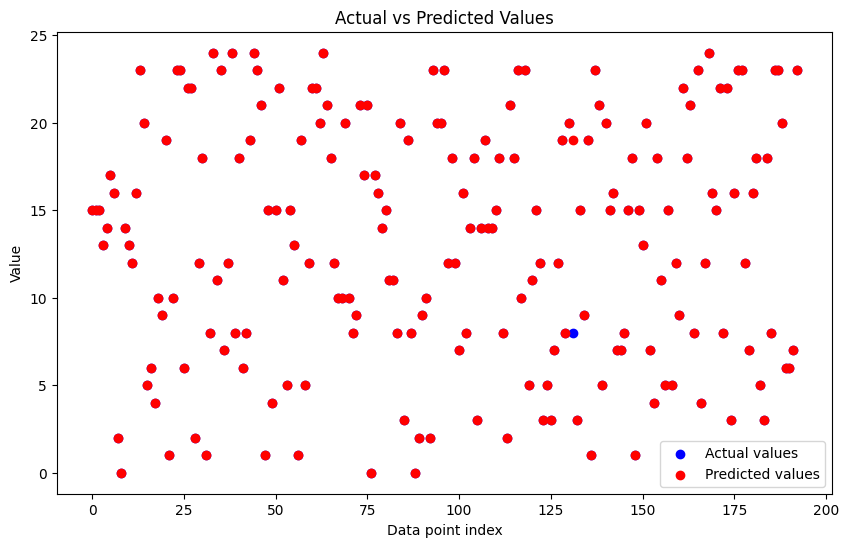

Model: Random Forest
Training Accuracy: 1.0
Test Accuracy: 0.9844559585492227
Precision: 0.9862411285757826
Recall: 0.9844559585492227
F1 Score: 0.9822464045261973
****************************************************************************************************


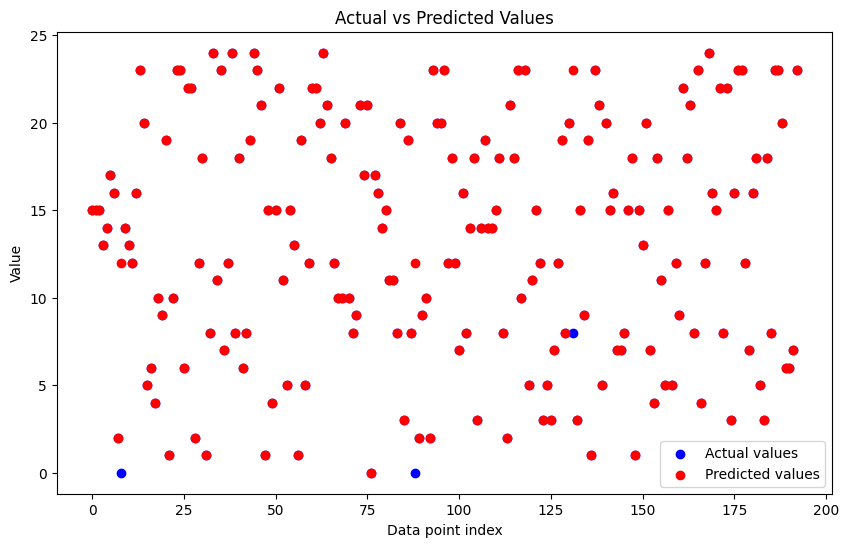

************************************************************
all models trained


In [ ]:


import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize WordNet lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def cleanResume(txt):
    # Convert to lowercase
    txt = txt.lower()
    # Remove URLs
    txt = re.sub(r'http\S+', '', txt)
    # Remove RT and cc
    txt = re.sub(r'\b(rt|cc)\b', '', txt)
    # Remove hashtags
    txt = re.sub(r'#\S+', '', txt)
    # Remove mentions
    txt = re.sub(r'@\S+', '', txt)
    # Remove special characters and punctuations
    txt = re.sub(r'[^\w\s]', ' ', txt)
    # Remove non-ASCII characters
    txt = re.sub(r'[^\x00-\x7f]', '', txt)
    # Tokenize the text
    tokens = word_tokenize(txt)
    # POS tagging
    tagged_tokens = pos_tag(tokens)
    # Lemmatize and remove stopwords
    lemmatized_tokens = []
    for word, tag in tagged_tokens:
        if word not in stop_words:
            if tag.startswith('V'):  # Verb
                lemmatized_word = lemmatizer.lemmatize(word, pos='v')
            elif tag.startswith('J'):  # Adjective
                lemmatized_word = lemmatizer.lemmatize(word, pos='a')
            elif tag.startswith('R'):  # Adverb
                lemmatized_word = lemmatizer.lemmatize(word, pos='r')
            else:  # Noun (default)
                lemmatized_word = lemmatizer.lemmatize(word)
            lemmatized_tokens.append(lemmatized_word)
    # Join tokens back into a single string
    cleanText = ' '.join(lemmatized_tokens)
    return cleanText

# Load the dataset
df = pd.read_csv('/content/Dataset.csv')

# Clean the 'Resume' column
df['Cleaned_Resume'] = df['Resume'].apply(cleanResume)

# Apply LabelEncoder to the 'Category' column
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' data
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Resume'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.2, random_state=42)

# Define models
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()
}

# Train models and evaluate performance
for model_name, model in models.items():
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train, y_train)
    train_accuracy = ovr_model.score(X_train, y_train)
    test_accuracy = ovr_model.score(X_test, y_test)
    predicted_values = ovr_model.predict(X_test)
    precision = precision_score(y_test, predicted_values, average="weighted")
    recall = recall_score(y_test, predicted_values, average="weighted")
    f1 = f1_score(y_test, predicted_values, average="weighted")
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("*" * 100)

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual values')
    plt.scatter(range(len(predicted_values)), predicted_values, color='red', label='Predicted values')
    plt.xlabel('Data point index')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

print("*"*60)
print("all models trained")


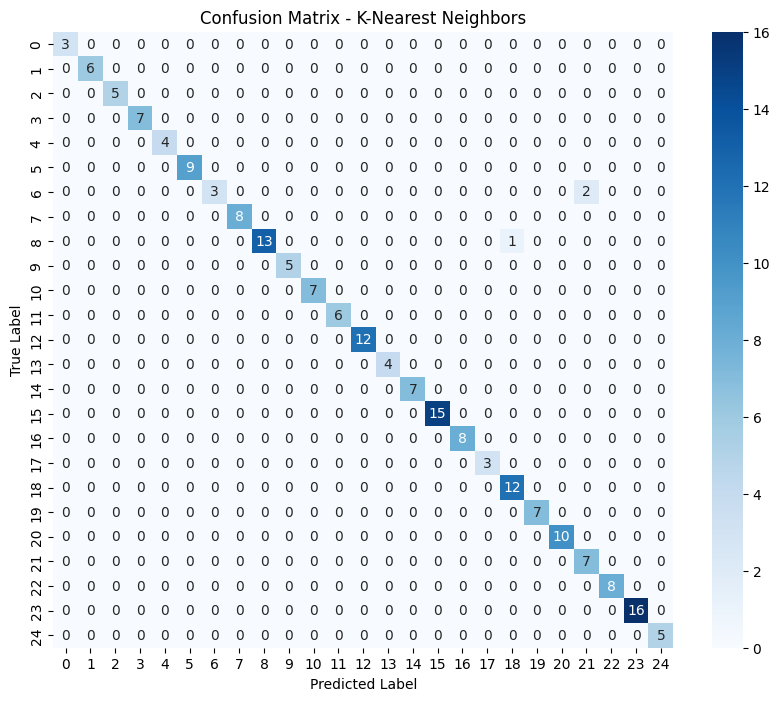

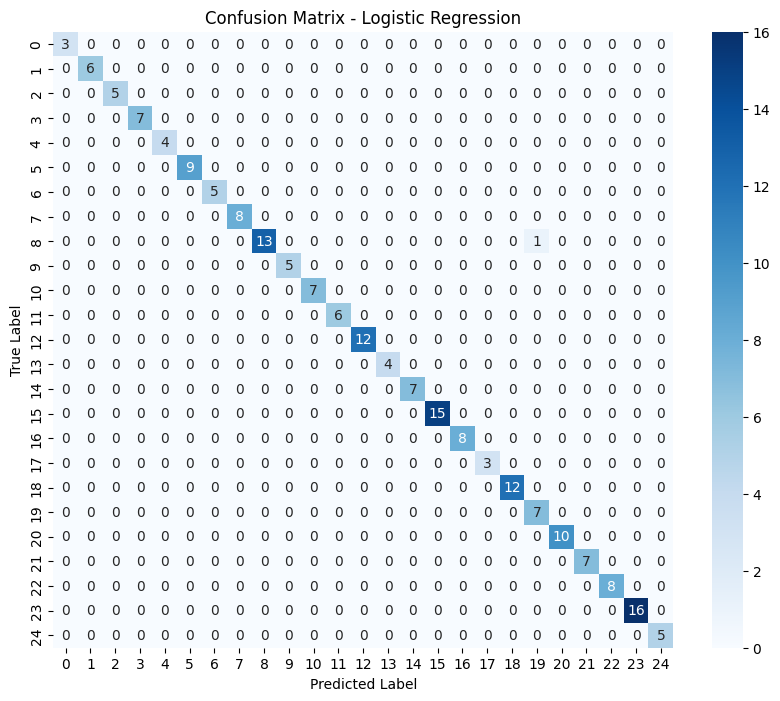

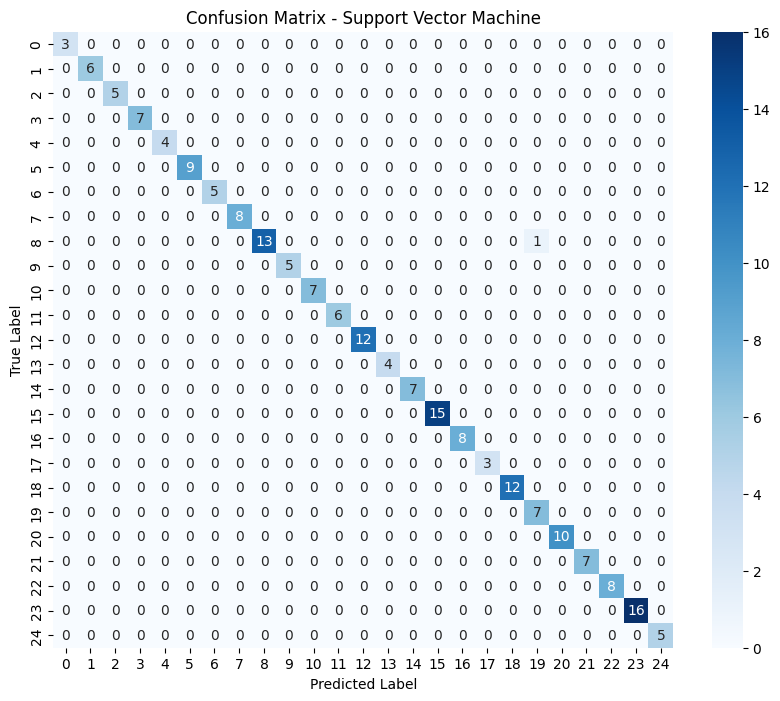

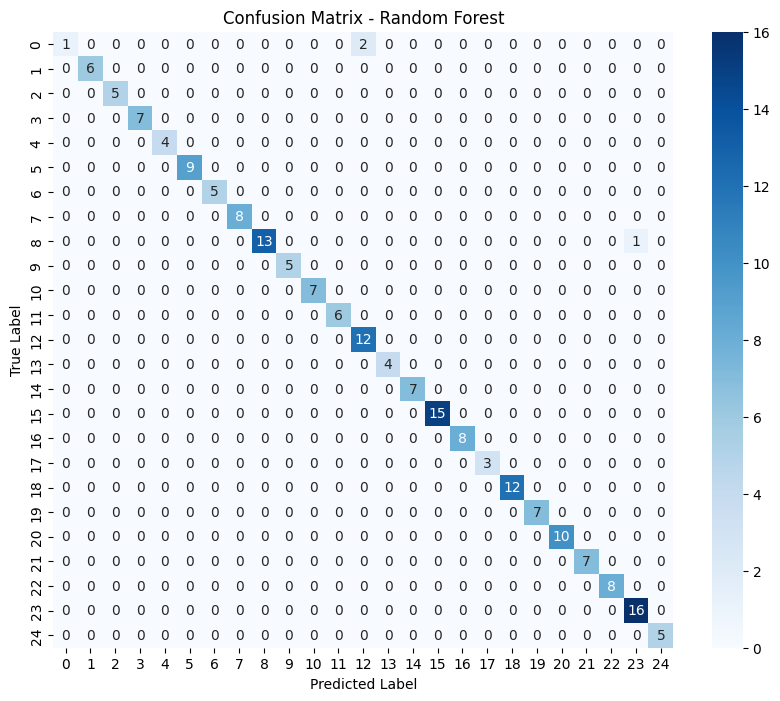

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

# Train models and evaluate performance
for model_name, model in models.items():
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train, y_train)
    predicted_values = ovr_model.predict(X_test)

    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test, predicted_values)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mat, annot=True, fmt='d',
                cmap='Blues',  # Default colormap
                xticklabels=le.inverse_transform(ovr_model.classes_),
                yticklabels=le.inverse_transform(ovr_model.classes_))

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [ ]:
import pickle
pickle.dump(tfidfd,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))